<a href="https://colab.research.google.com/github/kcenia4010/MachineLearning/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи:
От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

In [601]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
filename = r'/content/drive/MyDrive/netflix-rotten-tomatoes-metacritic-imdb.csv'
import csv

data = pd.read_csv(filename, sep = ',', header=0, engine = 'python')
data

Mounted at /content/drive


,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/80031595,NaN,Seung Yeon decides to chase her dream of becom...,NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,"Animal Tales,Family Comedies,Family Adventures...",NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70242630,NaN,"Shrek celebrates Halloween, Puss in Boots is c...",NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,...,2015-04-14,Fox,https://www.netflix.com/watch/70221348,NaN,Join your DreamWorks friends for these four ho...,82.0,https://occ-0-2851-38.1.nflxso

In [602]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [603]:
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


# Визуализируем данные

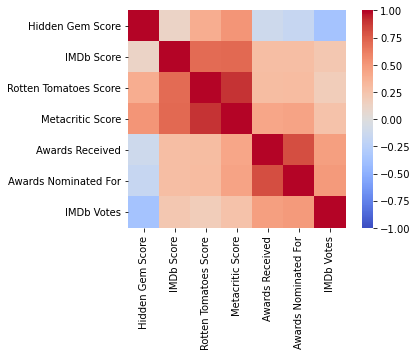

In [604]:
import sys
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

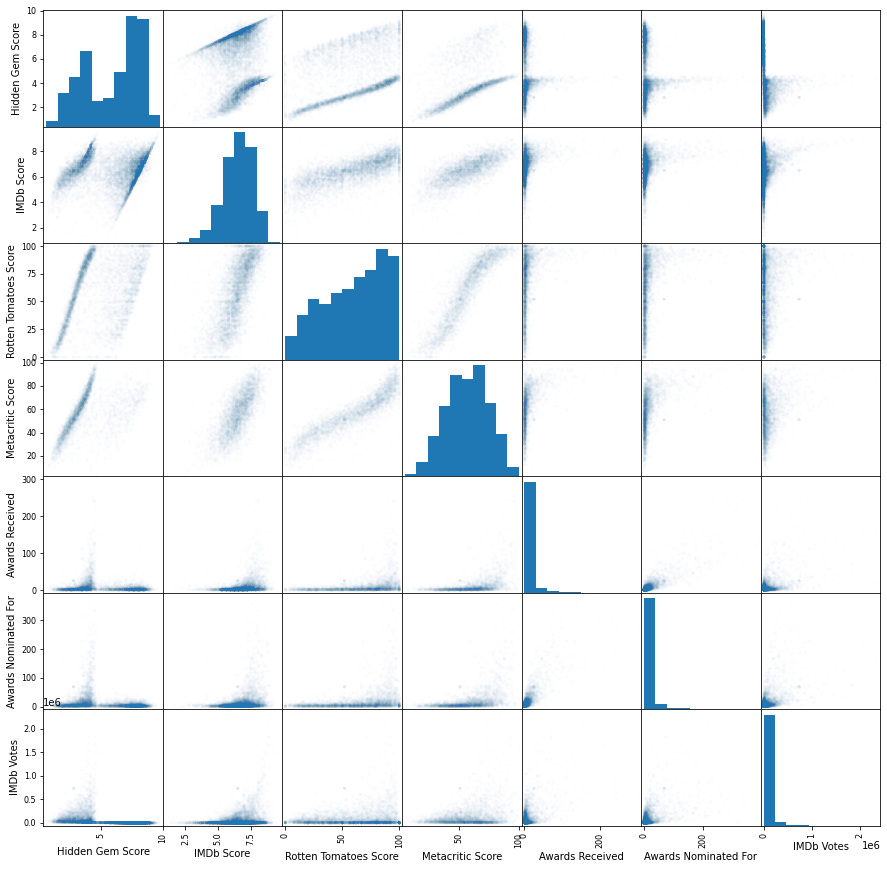

In [605]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

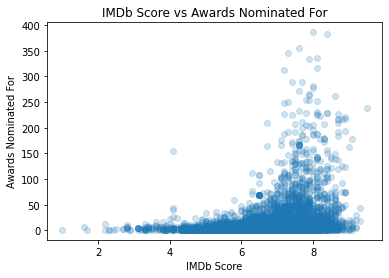

In [606]:
plt.plot(data['IMDb Score'], data['Awards Nominated For'], 'o', alpha = 0.2)
plt.xlabel('IMDb Score')
plt.ylabel('Awards Nominated For')
plt.title('IMDb Score vs Awards Nominated For')
pass

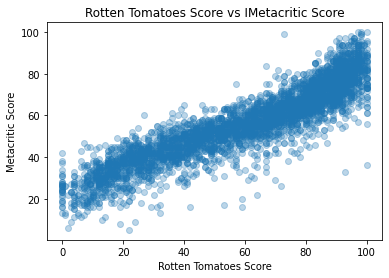

In [607]:
plt.plot(data['Rotten Tomatoes Score'], data['Metacritic Score'], 'o', alpha = 0.3)
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Metacritic Score')
plt.title('Rotten Tomatoes Score vs IMetacritic Score')
pass

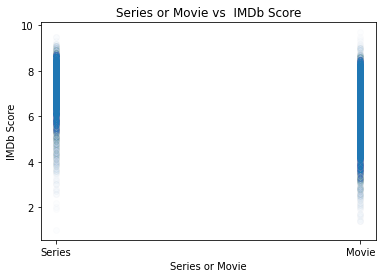

In [608]:
plt.plot(data['Series or Movie'], data['IMDb Score'], 'o', alpha = 0.01)
plt.xlabel('Series or Movie')
plt.ylabel('IMDb Score')
plt.title('Series or Movie vs  IMDb Score')
pass

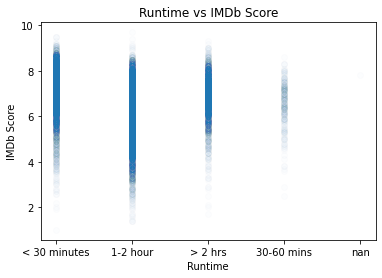

In [609]:
plt.plot(data['Runtime'].astype(str), data['IMDb Score'], 'o', alpha = 0.01)
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('Runtime vs IMDb Score')
pass

По данным графикам можно установить, что сериалы и длинные фильмы (больше 2 часов), в основном получают высокие оценки. Или, что в основом фильмы с высоким рейтингом IMDb номинируются на награды.

# Готовим данные

Удалим некоторые признаки большим количеством уникальных значей из датасета. А так же значение NaN

In [610]:
data.drop(labels=["Title", "Actors", "Production House", "Summary"], axis=1)
data.drop(labels=["Release Date", "Netflix Link", "Netflix Release Date", "IMDb Link"], axis=1)
data.drop(labels=["Image", "TMDb Trailer", "Poster", "Trailer Site"], axis=1)
data.drop(labels=["Boxoffice"], axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 15 to 15461
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  2111 non-null   object 
 1   Genre                  2111 non-null   object 
 2   Tags                   2111 non-null   object 
 3   Languages              2111 non-null   object 
 4   Series or Movie        2111 non-null   object 
 5   Hidden Gem Score       2111 non-null   float64
 6   Country Availability   2111 non-null   object 
 7   Runtime                2111 non-null   object 
 8   Director               2111 non-null   object 
 9   Writer                 2111 non-null   object 
 10  Actors                 2111 non-null   object 
 11  View Rating            2111 non-null   object 
 12  IMDb Score             2111 non-null   float64
 13  Rotten Tomatoes Score  2111 non-null   float64
 14  Metacritic Score       2111 non-null   float64
 15  Aw

In [611]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
categorical_columns
data['Series or Movie'].unique()

array(['Movie'], dtype=object)

Разделим категориальные признаки на бинарные и небинарные. Для бинарных признаков заменим значения на 0 и 1. К небинарным признакам применим метод векторизации.

In [612]:
binary_columns    = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]
print(binary_columns)
data["Trailer Site"].unique()

['Trailer Site']


array(['YouTube', 'Vimeo'], dtype=object)

In [635]:
data.loc[data['Trailer Site'] == 'Vimeo', 'Trailer Site'] = 0
data.loc[data['Trailer Site'] == 'YouTube', 'Trailer Site'] = 1

In [614]:
Genre = data['Genre'].str.get_dummies(",")
Languages = data['Languages'].str.get_dummies(",")
Country = data['Country Availability'].str.get_dummies(",")
Votes = pd.get_dummies(data['IMDb Votes'])

In [615]:
Runtime = data['Runtime'].str.get_dummies()
Director = data['Director'].str.get_dummies(",")
Writer = data['Writer'].str.get_dummies(",")
View = data['View Rating'].str.get_dummies()

In [616]:
data_nonbinary = pd.concat((Genre, Languages, Country, Runtime, Director, Writer, View, Votes), axis = 1)
data_nonbinary

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,1522306.0,1625286.0,1645871.0,1664865.0,1684368.0,1814709.0,1831004.0,2072912.0,2308981.0,2354197.0
15,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15456,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15457,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15459,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15460,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Нормализуем количественные признаки

In [617]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
15,0.105779,1.767813,0.109144,-0.094349,3.833991,4.781292,3.128939
16,-0.543889,-0.294104,-0.518766,-0.562987,0.488759,0.995811,2.231103
17,0.941068,1.442247,1.207988,1.428724,1.266720,1.591012,2.367699
28,0.384209,0.248505,0.776300,0.667188,-0.483692,-0.623137,-0.712420
60,0.755448,1.008159,0.933277,1.487304,0.216473,-0.313633,-0.586708
...,...,...,...,...,...,...,...
15456,-0.636699,0.031462,-0.793477,-0.738726,-0.289202,-0.408865,0.565974
15457,-0.822319,0.031462,-1.146677,-0.738726,-0.483692,-0.527905,0.165200
15459,-0.358270,0.031462,-0.087078,-0.504407,-0.405896,-0.527905,-0.733453
15460,-1.286368,-2.030455,-1.578366,-0.914466,-0.094711,-0.123168,0.140701


Cоединяем данные

In [618]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data.describe(include="all")

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,Action,Adventure,Biography,...,1625286.0,1645871.0,1664865.0,1684368.0,1814709.0,1831004.0,2072912.0,2308981.0,2354197.0,Trailer Site
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2107.0
mean,2.692725e-16,-2.490770e-16,2.221498e-16,-6.058631e-17,-2.356134e-17,-5.217154e-17,4.039087e-17,0.014685,0.173851,0.019896,...,0.000474,0.000474,0.000474,0.000474,0.000474,0.000947,0.000474,0.000474,0.000474,NaN
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.120317,0.379071,0.139675,...,0.021765,0.021765,0.021765,0.021765,0.021765,0.030773,0.021765,0.021765,0.021765,NaN
min,-2.585705e+00,-4.960548e+00,-2.559476e+00,-3.199076e+00,-4.836920e-01,-6.231373e-01,-7.785497e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,-6.366990e-01,-6.196701e-01,-7.149884e-01,-6.801466e-01,-4.447939e-01,-5.279050e-01,-6.066543e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.296963e-02,3.146160e-02,2.661222e-01,8.139005e-02,-3.669978e-01,-3.612486e-01,-3.331517e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,5.698284e-01,6.825933e-01,8.155441e-01,7.257673e-01,-1.691540e-02,4.348833e-02,2.040129e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


# Разбиение
Будем предсказывать рейтинг IMDb

In [619]:
X = data.drop('IMDb Score', axis = 1) 
y = data['IMDb Score']
X=X.to_numpy()
y=y.to_numpy()

In [620]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

1899 212 (1899,) (212,)


In [621]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

# Обучение

In [632]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [633]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [634]:
print("err_train=", err_train)
print("err_test=", err_test)

err_train= 0.23012111637704055
err_test= 0.23113207547169812


In [625]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[   0    0    0    3    0    0    0]
 [   0    0    1   15    2    0    0]
 [   0    0    3   20   24    0    0]
 [   0    0    2   78  142    0    0]
 [   0    0    0   11 1290   13    0]
 [   0    0    0    0  162  118    0]
 [   0    0    0    0    0   12    3]]

[[  0   0   1   0   0]
 [  0   0   2   0   0]
 [  0   1   5  23   0]
 [  0   0   2 146   0]
 [  0   0   0  24   8]]



Наилучший результат достигается при n_neighbors=21

# Вывод
Погрешность на обучающей и тестовой выборках достаточно велика. Во многом на это повлиял тот факт, что в датасете было недостаточно данных. Оказалось много пропущенных значений.